In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Custom Functions

In [5]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z)+ 1.0)

In [11]:
my_softplus(tf.constant([2,3,5], dtype=tf.float32)) # works only for float32

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2.126928 , 3.0485873, 5.0067153], dtype=float32)>

In [12]:
def my_glorot_initializer(shape, dtype = tf.float32):
    stddev = tf.sqrt(2./ (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev = stddev, dtype=dtype)

In [13]:
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

In [14]:
def my_positive_weights(weights):
    return tf.where(weights <0., tf.zeros_like(weights), weights)

In [17]:
# load dataset for linear problem
from sklearn.datasets import load_boston

data = load_boston()
X, y = data.data, data.target

In [18]:
y = y.reshape(-1,1)

In [19]:
# simple model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation = my_softplus, kernel_initializer = my_glorot_initializer),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

model.compile( loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['mae'])

history = model.fit(X,y, epochs = 20)

Epoch 1/20
16/16 [==============================] - 2s 12ms/step - loss: nan - mae: nan
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: nan - mae: nan
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: nan - mae: nan
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: nan - mae: nan
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: nan - mae: nan
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: nan - mae: nan
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: nan - mae: nan
Epoch 8/20
16/16 [==============================] - 0s 10ms/step - loss: nan - mae: nan
Epoch 9/20
16/16 [==============================] - 0s 12ms/step - loss: nan - mae: nan
Epoch 10/20
16/16 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 11/20
16/16 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 12/20
16/16 [==============

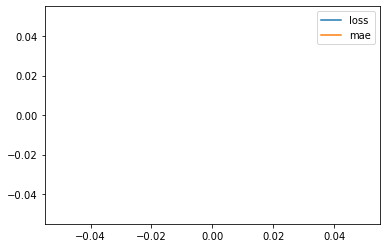

In [20]:
pd.DataFrame(history.history).plot()